# Exercise 2: Markov Chains and Markov Decision Processes (MDP) 

This exercise deals with the formal handling of Markov chains and Markov decision processes. 

## 1) Markov Chain: State Transition
The graph shows the last beer problem. 
The nodes show the states.
The arrows define the possible transitions to other states and the numbers besides the arrows define the propability of the corresponding transition.
If you are for example in the state "Inital Beer", with 30% propability you go to have a pizza, with 60% propability you meet friends and with 10% propability you end up sleeping.

Define the state transition probability matrix $\mathcal{P}_{xx'}$ of the graph shown in the figure below!

![](Last_Beer_Graph.png)

With $p_k = \begin{bmatrix}
\text{Pr}_k \lbrace \text{Inital Beer} \rbrace \\
\text{Pr}_k \lbrace \text{Meet Friends} \rbrace \\
\text{Pr}_k \lbrace \text{Pizza} \rbrace \\
\text{Pr}_k \lbrace \text{Another Beer} \rbrace \\
\text{Pr}_k \lbrace \text{"Last Beer"}\rbrace \\
\text{Pr}_k \lbrace \text{Sleep} \rbrace \\
\end{bmatrix}^\text{T}$


The state transition probability $\mathcal{P}_{xx'} = \begin{bmatrix}
0 & 0.6 & 0.3 & 0 & 0 & 0.1 \\
0 & 0 & 0.4 & 0.4 & 0.1 & 0.1 \\
0 & 0 & 0 & 0.7 & 0 & 0.3 \\
0 & 0 & 0 & 0.6 & 0.3 & 0.1 \\
0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 1
\end{bmatrix}$ 

## 2 ) Markov Chain: Stationary State
Using $p = p \mathcal{P}$, calculate the stationary state probability.

Please note that the sum of the state propabilities equals one for any specific point in time.

## 2) Solution
\begin{align}
p &= p \mathcal{P} \\
p \left(I_\text{6} - \mathcal{P}_{xx'} \right) &=0
\end{align}

With:

$\left( I_\text{6} - \mathcal{P}_{xx'} \right) = \begin{bmatrix}
1 & -0.6 & -0.3 & 0 & 0 & -0.1 \\
0 & 1 & -0.4 & -0.4 & -0.1 & -0.1 \\
0 & 0 & 1 & -0.7 & 0 & -0.3 \\
0 & 0 & 0 & 0.4 & -0.3 & -0.1 \\
0 & 0 & 0 & 0 & 1 & -1 \\
0 & 0 & 0 & 0 & 0 & 0
\end{bmatrix}$ 

Solving for $p$ yields, that $p_{1,...,5} = 0$.

Due to $\sum_n p_n = 1$: $p_6 = 1$

## 3) Markov Reward Process: Evaluating States

In the following rewards for every state are defined.

Given the reward distribution $r_\mathcal{X}$, calculate the state-values $v_\mathcal{X}$.  

The states are defined by:
$\mathcal{X} = \left\lbrace \begin{matrix}
\text{Inital Beer}\\
\text{Meet Friends}\\
\text{Pizza}\\
\text{Another Beer}\\
\text{"Last Beer"}\\
\text{Sleep}\\
\end{matrix}
\right\rbrace$

The rewards are defined by:
$r_\mathcal{X} = \begin{bmatrix}
+1\\
+1\\
+2\\
+1\\
-3\\
0\\
\end{bmatrix}$

The state-value is defined by the state-value Bellman equation: $v_\mathcal{X} = r_\mathcal{X} + \gamma \mathcal{P}_{xx'} v_\mathcal{X}$. Assume that $\gamma = 0.9$ and write a Python program to calculate $v_\mathcal{X}$. Which state is most promising? Why?

Which state is most promising when $\gamma = 0.1$?

## 3) Solution

\begin{align}
v_\mathcal{X} &= r_\mathcal{X} + \gamma \mathcal{P}_{xx'} v_\mathcal{X}\\
v_\mathcal{X} - \gamma \mathcal{P}_{xx'} v_\mathcal{X} &= r_\mathcal{X}\\
\left( I_6 - \gamma \mathcal{P}_{xx'} \right) v_\mathcal{X} &= r_\mathcal{X}\\
v_\mathcal{X} &= \left( I_6 - \gamma \mathcal{P}_{xx'} \right)^{-1} r_\mathcal{X}\\
\end{align}

For $\gamma=0.9$, the state "Initial Beer" has very high state-value because the highest rewards can be expected for any paths taken from there.

For $\gamma=0.1$, the future collectable reward has lost importance for the evaluation of the state-value, the state-value now gives a rather short-sighted estimation. Thus, the most valuable state can now be found to be the "Pizza"-state, as this state holds the highest immediate reward.

In [ ]:
import numpy as np

gamma = 0.9 #discount factor

P_xx = np.array([[0,0.6,0.3,0,0,0.1],
                 [0,0,0.4,0.4,0.1,0.1],
                 [0,0,0,0.7,0,0.3],
                 [0,0,0,0.6,0.3,0.1],
                 [0,0,0,0,0,1],
                 [0,0,0,0,0,1]]) #state transition probability

r_X = np.array([1,1,2,1,-3,0]) #rewards
r_X = r_X.reshape(-1,1) #make column vector

v_X = np.matmul(np.linalg.inv(np.eye(6)-gamma*P_xx), r_X)

print(v_X)


[[ 2.52414061]
 [ 1.69237391]
 [ 2.26021739]
 [ 0.41304348]
 [-3.        ]
 [ 0.        ]]


## 4) Markov Decision Process: State Transition

The graph shows an MDP.
The nodes are the states. 
In every state you can choose between two actions (Lazy or Productive). 
Taken actions impact the state transition probability to the next state.
If you for example have a "Hangover" and decide to be "Productive", there is a 30% chance for you to "Visit Lecture" and a 70% chance to stay in the "Hangover" state.

Define the lazy state transition probabilitiy $\mathcal{P}_{xx'}^{u=\text{Lazy}}$ and the productive state transition probability $\mathcal{P}_{xx'}^{u=\text{Productive}}$ of the graph shown in the figure below.

![](Hangover_MDP_Graph.png)

With $p_k = \begin{bmatrix}
\text{Pr}_k \lbrace \text{Hangover} \rbrace \\
\text{Pr}_k \lbrace \text{Sleep} \rbrace \\
\text{Pr}_k \lbrace \text{More Sleep} \rbrace \\
\text{Pr}_k \lbrace \text{Visit Lecture} \rbrace \\
\text{Pr}_k \lbrace \text{Study}\rbrace \\
\text{Pr}_k \lbrace \text{Pass the Exam} \rbrace \\
\end{bmatrix}^\text{T}$

## 4) Solution


\begin{align}
\mathcal{P}_{xx'}^{u=\text{Lazy}}&=\begin{bmatrix}
0 & 1 & 0 & 0 & 0   & 0\\
0 & 0 & 1 & 0 & 0   & 0\\
0 & 0 & 1 & 0 & 0   & 0\\
0 & 0 & 0 & 0 & 0.8 & 0.2\\ 
0 & 0 & 1 & 0 & 0   & 0\\
0 & 0 & 0 & 0 & 0   & 1\\
\end{bmatrix}\\
\mathcal{P}_{xx'}^{u=\text{Productive}}&=\begin{bmatrix}
0.7 & 0 & 0   & 0.3 & 0   & 0\\
0   & 0 & 0.4 & 0.6 & 0   & 0\\
0   & 0 & 0.5 & 0   & 0.5 & 0\\
0   & 0 & 0   & 0   & 1   & 0\\ 
0   & 0 & 0   & 0   & 0.1 & 0.9\\
0   & 0 & 0   & 0   & 0   & 1\\
\end{bmatrix}
\end{align}

## 5) Markov Decision Process: Trivial Policy Evaluation

The rewards for this problem are defined by:
$r_\mathcal{X} = r_\mathcal{X}^{u=\text{Productive}} = r_\mathcal{X}^{u=\text{Lazy}} = \begin{bmatrix}
-1\\
-1\\
-1\\
-1\\
-1\\
0\\
\end{bmatrix}$.

How can we interprete these rewards?
Evaluate both the lazy policy and the productive policy using $\gamma = 0.9$.

Bonus question: Can we evaluate the state-value of $\lbrace x=\text{More Sleep}, u=\text{Lazy}\rbrace$ for an infinite time horizon without the use of the Bellman equation?

YOUR ANSWER HERE

In [1]:
import numpy as np

P_xx_lazy = np.array ([[0,1,0,0,0,0],
                      [0,0,1,0,0,0],
                      [0,0,1,0,0,0],
                      [0,0,0,0,0.8,0.2],
                      [0,0,1,0,0,0],
                      [0,0,0,0,0,1]])

P_xx_productive = np.array([[0.7,0,0,0.3,0,0],
                            [0,0,0.4,0.6,0,0],
                            [0,0,0.5,0,0.5,0],
                            [0,0,0,0,1,0],
                            [0,0,0,0,0.1,0.9],
                            [0,0,0,0,0,1]])

gamma=0.9

r_X = np.array([-1,-1,-1,-1,-1,0]).reshape(-1,1)
for P_xx in [P_xx_lazy, P_xx_productive]:
  v_X = np.matmul(np.linalg.inv(np.eye(6)-gamma*P_xx), r_X)
  print(v_X)

[[-10. ]
 [-10. ]
 [-10. ]
 [ -8.2]
 [-10. ]
 [  0. ]]
[[-4.15414315]
 [-3.05228771]
 [-2.71728272]
 [-1.98901099]
 [-1.0989011 ]
 [ 0.        ]]


In [2]:
# Bonus question: Can we evaluate the state-value of {𝑥=More Sleep,𝑢=Lazy} for an infinite time horizon without the use of the Bellman equation?
## Yes we can evaluate the state more-sleep for an infinite time horizon because the reward will stay the same forever.Thus, we can make use of the geometric series convergence. 

v_3 = -1*1/(1-0.9)
print(v_3)

-10.000000000000002


## 6) Action-Value Function Evalution

Now, the policy is defined by:
\begin{align}
\pi(u_k=\text{Productive} | x_k)&=\alpha,\\
\pi(u_k=\text{Lazy} | x_k)&=1-\alpha, \forall x_k \in \mathcal{X}
\end{align}

Calculate action-values for the problem as described using the 'fifty-fifty' policy ($\alpha = 0.5$) according to the Bellman Expectation Equation: $q_\pi(x_k, u_k) = \mathcal{R}^u_x + \gamma \sum_{x_{k+1} \in \mathcal{X}} p^u_{xx'} v_\pi(x_{k+1})$ $\forall x_k, u_k \in \mathcal{X}, \mathcal{U}$.

## 6) Solution


In [3]:
import numpy as np

gamma = 0.9
alpha = 0.5
no_states = 6
no_actions = 2
r_X = np.array([-1, -1, -1, -1, -1, 0]).reshape(-1, 1)
q_XU = np.zeros([no_states, no_actions])

P_xx_lazy = np.array([[0, 1, 0, 0, 0,   0],
                      [0, 0, 1, 0, 0,   0],
                      [0, 0, 1, 0, 0,   0],
                      [0, 0, 0, 0, 0.8, 0.2],
                      [0, 0, 1, 0, 0,   0],
                      [0, 0, 0, 0, 0,   1]])

P_xx_productive = np.array([[0.7,  0,   0,   0.3, 0,   0],
                            [0,    0,   0.4, 0.6, 0,   0],
                            [0,    0,   0.5, 0,   0.5, 0],
                            [0,    0,   0,   0,   1,   0],
                            [0,    0,   0,   0,   0.1, 0.9],
                            [0,    0,   0,   0,   0,   1]])

P_xx_mean = alpha*P_xx_productive + (1-alpha)*P_xx_lazy
v_X = np.linalg.inv(np.eye(6)-gamma*P_xx_mean) @ r_X   # @ matmul
transition_tabs = np.dstack([P_xx_lazy, P_xx_productive])
q_XU = r_X + gamma * np.squeeze(np.transpose(transition_tabs, [0,2,1]) @ v_X)

print(q_XU)

[[-6.07176629 -5.82932926]
 [-6.07830245 -5.1922893 ]
 [-6.07830245 -5.20681411]
 [-3.66826061 -4.33532576]
 [-6.07830245 -1.33353258]
 [ 0.          0.        ]]


## 7) Markov Decision Problem: Stochastic Policy Evalution

Plot the state-value of the states "Lecture" and "Study" for different $\alpha$. What do we see? Why?

## 7) Solution

In [4]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')

n=6 #dimension of state space
no_of_samples = 1000

alphas = np.linspace(0,1,no_of_samples)
v_n_alpha = np.zeros([n, no_of_samples])

gamma = 0.9
P_xx_lazy = np.array([[0, 1, 0, 0, 0,   0],
                      [0, 0, 1, 0, 0,   0],
                      [0, 0, 1, 0, 0,   0],
                      [0, 0, 0, 0, 0.8, 0.2],
                      [0, 0, 1, 0, 0,   0],
                      [0, 0, 0, 0, 0,   1]])

P_xx_productive = np.array([[0.7,  0,   0,   0.3, 0,   0],
                            [0,    0,   0.4, 0.6, 0,   0],
                            [0,    0,   0.5, 0,   0.5, 0],
                            [0,    0,   0,   0,   1,   0],
                            [0,    0,   0,   0,   0.1, 0.9],
                            [0,    0,   0,   0,   0,   1]])

r_X = np.array([-1, -1, -1, -1, -1, 0]).reshape(-1, 1)
alphas = alphas.reshape(-1,1,1)
P_xx_mean = alphas * P_xx_productive + (1-alpha * P_xx_lazy)
v_n_alpha = np.squeeze(np.linalg.inv(np.eye(6).reshape(1,6,6) - gamma * P_xx_mean) @ r_X).T

(-10.0, 0.0)

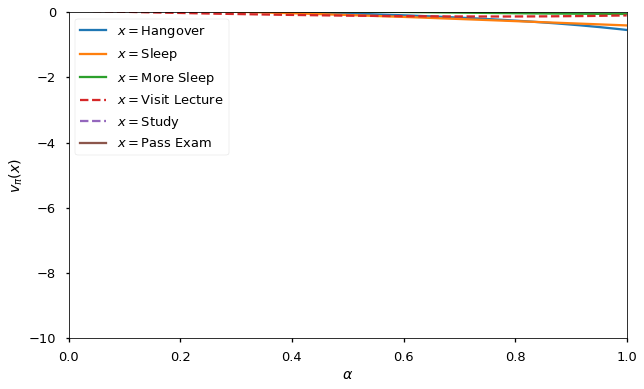

In [6]:
plt.figure(figsize=[10, 6])
states = ["Hangover", "Sleep", "More Sleep", "Visit Lecture", "Study", "Pass Exam"]
alphas = alphas.flatten()
for state, vnalp in zip(states, v_n_alpha):
    ls = '--' if state in ['Visit Lecture', 'Study'] else '-'
    plt.plot(alphas, vnalp, ls=ls, label=r"$x=${}".format(state))
    
plt.legend()
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$v_\pi(x)$")
plt.xlim([0, 1])
plt.ylim([-10, 0])

YOUR ANSWER HERE